<a href="https://colab.research.google.com/github/griops/Pembelajaran-Mesin-Metode-Regresi/blob/main/Tubes_Regresi_Kelompok_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pembelajaran Mesin dengan metode Regresi Linier


Overview Regresi Linear
Regresi Linier atau Linear Regression adalah suatu model statistik yang umum dan paling sederhana yang digunakan untuk Machine Learning untuk melakukan prediksi dengan cara supervised learning.
Regresi Linier hanya bisa digunakan untuk data yang bersifat interval dan ratio yang biasanya bersifat diskrit dan kontinu, dan merupakan analisis bivariate dan multivariate.

Pada kelompok kami menggunakan analisis bivariate atau korelasi antara 2 variabel.  

Dimana salah satunya adalah variabel independen (x) variabel utama yang mungkin akan mempengaruhi nilai variabel y dan satu lagi adalah variabel dependen (y) nilai variabel ini akan tergantung dari nilai variabel independennya. 

x:= Horsepower (HP)
y:= Waktu Akselerasi (s)

Overview Colab
Kami menggunakan google colab, mengingat keberadaan kami yang tidak satu kota. Menggunakan google colab sangat cocok untuk pemrograman python dan bekerja menggunakan Google Colab untuk pertama kalinya benar-benar fenomenal dimana hanya membutuhkan koneksi internet saja. 

Overview scikit
Scikit-learn merupakan open source machine learning library menyediakan berbagai macam machine learning dengan bahasa python yang mendukung supervised and unsupervised learning.

In [178]:
#kami menggunakan dataset dari vega, untuk menggunakannya kita cukup mengimpor library vega_datasets
import vega_datasets

In [179]:
#Library Matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
#Library seaborn untuk membuat prediksi tren
import seaborn as sn
#Library numpy untuk fungsi numeris matematik
import numpy as np

#Sklearn untuk machine learning
#Library linear_model untuk regresi linier pada sklearn
from sklearn.linear_model import LinearRegression
#Library model_selection untuk mengelola data set menjadi training maupun tes pada sklearn
from sklearn.model_selection import train_test_split
#Library model_selection untuk evaluasi kebenaran prediksi
import sklearn.metrics as sm

In [180]:
#memilih/memanggil data set
cr = vega_datasets.data.cars()
#melihat isi dataset
cr.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [181]:
#melakukan pendefisian parameter
HP = cr['Horsepower']
Acc = cr['Acceleration']
#Kami mengambil parameter dari tabel dataset berupa nilai horsepower dan acceleration kendaraan
#Dilakukan pengisian terhadap salah satu isi dataset yang blank dengan nilai rata-ratanya sehingga semua data terisi dengan nilai yang tidak berubah dan dapat dilakukan prediksi 
HP = HP.fillna(HP.mean())
Acc = Acc.fillna(Acc.mean())

In [188]:
##mengubah data menjadi ke bentuk array numpy
Daya = np.array(HP)
Percepatan = np.array(Acc)
len(Daya)

406

In [189]:
len(Percepatan)

406

In [183]:
#melakukan reshape
Daya = Daya.reshape(len(Daya),1)
Percepatan = Percepatan.reshape(len(Percepatan),1)
len(Daya)

406

In [190]:
len(Percepatan)

406

In [184]:
#Melakukan pembagian data set sebagai data train dan data tes
Daya_belajar, Daya_uji, Percepatan_belajar, Percepatan_uji = train_test_split(Daya, Percepatan, test_size=0.22, train_size=0.78, random_state=42)

ini variabel lagi

In [185]:
#Melakukan permodelan regresi linier
linear_reg = LinearRegression()
#Dilakukan penentuan dengan training data sumbu x, y
linear_reg.fit(Daya_belajar,Percepatan_belajar)
#Dilakukan prediksi nilai berdasarkan parameter input
Prediksi_percepatan = linear_reg.predict(Daya_uji)

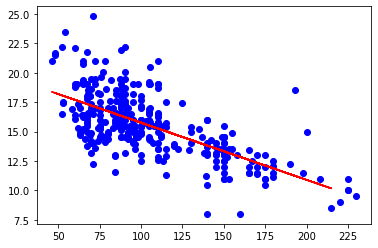

In [186]:
#Melakukan plot nilai pada grafik
plt.scatter(Daya_belajar,Percepatan_belajar,color='blue')
plt.plot(Daya_uji,Prediksi_percepatan,color='red')

In [187]:
#Melakukan pengujian terhadap akurasi training terhadap prediksi

#variance_score -> akurasi nilai regresi linier, jika akurasi mendekati 1 (100%) maka semakin baik. nilai bervariasi dari 0.0-1.0
print('1. Akurasi = ', sm.explained_variance_score(Percepatan_uji,Prediksi_percepatan))

#max_error -> selisih maksimal kesalahan nilai terhadap training
print('2. Error Maksimal = ', sm.max_error(Percepatan_uji,Prediksi_percepatan))

#mean_absolute_error -> rata-rata selisih kesalahan nilai terhadap training
print('3. Rerata Error = ', sm.mean_absolute_error(Percepatan_uji,Prediksi_percepatan))

#Mean squared error dari regression loss
print('4. Mean squared error  = ', sm.mean_squared_error(Percepatan_uji,Prediksi_percepatan))

#Mean squared error secara logaritmik dari regression loss
print('5. Mean squared error logaritmik  = ', sm.mean_squared_log_error(Percepatan_uji,Prediksi_percepatan))

#Nilai median dari error regresion --> Paling baik mendekati nol (0)
print('6. Median error  = ', sm.median_absolute_error(Percepatan_uji,Prediksi_percepatan))

#Nilai R^2 (coefficient of determination) regression score function --> Paling baik mendekati satu (1)
print('7. Koefisien R^2  = ', sm.r2_score(Percepatan_uji,Prediksi_percepatan))

#Nilai Rerata distribusi Poisson dari simpangan regression loss (sebanding dengan simpangan Tweedie yang memiliki power parameter=1)
print('8. Simpangan Tweedie (p=1) = ', sm.mean_poisson_deviance(Percepatan_uji,Prediksi_percepatan))

#Nilai Rerata distribusi Gamma dari simpangan regression loss (sebanding dengan simpangan Tweedie yang memiliki power parameter=2)
print('9. Simpangan Tweedie (p=2) = ',sm.mean_gamma_deviance(Percepatan_uji,Prediksi_percepatan))

#Note: Variabel transformasi power digunakan untuk membuat distribusi probabilistik menjadi Gaussian.

1. Akurasi =  0.5703992373362756
2. Error Maksimal =  6.51634132697691
3. Rerata Error =  1.6020502474095735
4. Mean squared error  =  3.9075869596579813
5. Mean squared error logaritmik  =  0.01454293174105107
6. Median error  =  1.3115136210799179
7. Koefisien R^2  =  0.5699743331548595
8. Simpangan Tweedie (p=1) =  0.2500580797960551
9. Simpangan Tweedie (p=2) =  0.016686011282842268
